![RichMinerals_H](RichMinerals_H.jpg)


# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [95]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [96]:
df_food = pd.read_csv('nutrition.csv')
df_food

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

**Executive Summary**: Guiding Insights and Recommendations for Nutritional Wellness

In appreciation of  engaged readers, this report unveils a collective exploration of nutrition challenges, driven by your invaluable participation. As we venture into the intricate world of nutrition, your involvement stands as a beacon, fostering a shared understanding that propels my journey.

**Key Recommendations:**

Maximizing Vitamin C Intake: Recommending the incorporation of diverse vitamin C-rich foods, such as bell peppers and strawberries, to optimize nutritional intake.

Caloric and Hydration Dynamics: Our exploration highlights a compelling relationship between calories and water content. 
Encouraging further research into the implications of this correlation for making informed dietary choices.

Balancing Dietary Patterns: Delving into the drawbacks of zero-carb and high-protein diets, we advocate for a balanced approach. Acknowledging the benefits of moderation and variety in sustaining a healthy lifestyle.

Rethinking Caloric Estimates: Our linear model challenges conventional caloric estimates, emphasizing the importance of data-driven scrutiny. Suggesting a continuous evaluation of nutritional information to refine our understanding of energy content.

##  Which fruit has the highest vitamin C content?

In [97]:
#Displays concise information about the DataFrame df_food
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [98]:
#Evaluates and reports the count of missing values (NaN) in each column of the DataFrame df_food.
df_food.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

In [99]:
#Duplicate the dataset 
df_food_copy = df_food.copy()
#Cleaning the string characters from the column of Vitamin C
df_food_copy["Vitamin C"] = df_food_copy["Vitamin C"].str.replace("mg" , " ")
#Print the first rows of cleaned Vitamin column
df_food_copy["Vitamin C"].head()

0      NaN
1    0.1  
2      NaN
3      NaN
4    0.0  
Name: Vitamin C, dtype: object

In [100]:
#Convert the 'Vitamin C' column in the DataFrame df_food_copy to float data type
df_food_copy["Vitamin C"] = df_food_copy["Vitamin C"].astype(float) 
# Group the DataFrame df_food_copy by the 'Item' column and calculate the sum of 'Vitamin C' for each group
df_Total_C = df_food_copy.groupby("Item")["Vitamin C"].sum().reset_index()
#Display the first 20 rows of the resulting DataFrame df_Total_C
df_Total_C.head(20)

,Item,Vitamin C
0,"APPLEBEE'S, 9 oz house sirloin steak",0.0
1,"APPLEBEE'S, Double Crunch Shrimp",0.0
2,"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid...",0.0
3,"APPLEBEE'S, chicken tenders platter",0.0
4,"APPLEBEE'S, chicken tenders, from kids' menu",0.0
5,"APPLEBEE'S, chili",1.1
6,"APPLEBEE'S, coleslaw",13.7
7,"APPLEBEE'S, crunchy onion rings",0.0
8,"APPLEBEE'S, fish, hand battered",0.0
9,"APPLEBEE'S, french fries",0.7


In [101]:
#Sort the DataFrame df_Total_C by the 'Vitamin C' column in descending order
high_C = df_Total_C.sort_values("Vitamin C", ascending=False)
# Access the value in the 'Vitamin C' column of the first row using iloc
# This corresponds to the highest Vitamin C value in the DataFrame
high_C['Vitamin C'].iloc[0]

2732.0

## What are some other sources of vitamin C?

In [102]:
# Create an empty list named 'source'
source = []

# Filter rows in the DataFrame df_Total_C where 'Vitamin C' is not equal to 0
source = df_Total_C.loc[df_Total_C['Vitamin C'] != 0]

# Sort the filtered DataFrame 'source' by the 'Vitamin C' column in descending order
high_C = source.sort_values("Vitamin C", ascending=False)

# Print the resulting DataFrame 'high_C'
print(high_C)

                                                   Item  Vitamin C
205   Babyfood, GERBER, 2nd Foods, apple, carrot and...     2732.0
1666  Beverages, Orange-flavor drink, breakfast type...     2400.0
1792  Beverages, fruit-flavored drink, powder, with ...     2400.0
5464                  Peppers, sweet, red, freeze-dried     1900.0
14                   Acerola, (west indian cherry), raw     1677.6
...                                                 ...        ...
5743  Pork, fresh, composite of trimmed retail cuts ...        0.1
5742  Pork, fresh, composite of trimmed retail cuts ...        0.1
5740  Pork, fresh, composite of trimmed retail cuts ...        0.1
5729                          Pork, fresh, backfat, raw        0.1
2231      Candies, confectioner's coating, butterscotch        0.1

[3530 rows x 2 columns]


## Describe the relationship between the calories and water content of a food item.

![maxresdefault](maxresdefault.jpg)


In [103]:
# Display basic information about the DataFrame
print(df_food_copy.info())

# Display the first few rows of the DataFrame
print(df_food_copy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   object 
 4   Protein       7793 non-null   object 
 5   Carbohydrate  7793 non-null   object 
 6   Total fat     7793 non-null   object 
 7   Cholesterol   7394 non-null   object 
 8   Fiber         7231 non-null   object 
 9   Water         7793 non-null   object 
 10  Alcohol       5399 non-null   object 
 11  Vitamin C     7332 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 730.7+ KB
None
   FDC_ID                                               Item  ... Alcohol Vitamin C
0  167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...  ...     NaN       NaN
1  167513  Pillsbury, Cinnamon Rolls with Icing, refr

In [104]:
# Descriptive statistics of the numerical columns
print(df_food_copy[['Calories', 'Water']].describe())

          Calories  Water
count         7793   7793
unique         667   4163
top     884.0 kcal  0.0 g
freq            77     92


In [105]:
# Remove "kcal" from the 'Calories' column and replace it with an empty space
df_food_copy["Calories"] = df_food_copy["Calories"].str.replace("kcal" , " ")

# Remove "g" from the 'Water' column and replace it with an empty space
df_food_copy["Water"] = df_food_copy["Water"].str.replace("g" , " ")

# Convert the 'Water' column to float data type
df_food_copy["Water"] = df_food_copy["Water"].astype(float)

# Convert the 'Calories' column to float data type
df_food_copy["Calories"] = df_food_copy["Calories"].astype(float)

#Display the first rows of table
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1 g,79.8 g,3.7 g,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0 g,46.0 g,1.8 g,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34,0.0 g,0.0


In [106]:
#Select the Columns Calories and Water:
calories_column = df_food_copy['Calories']
water_column = df_food_copy['Water']

#Calculate Pearson Correlation and p-value:
correlation_coefficient, p_value = stats.pearsonr(calories_column, water_column)

#Print the Results:
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("Two-tailed p-value:", p_value)


Pearson Correlation Coefficient: -0.8954571656706273
Two-tailed p-value: 0.0


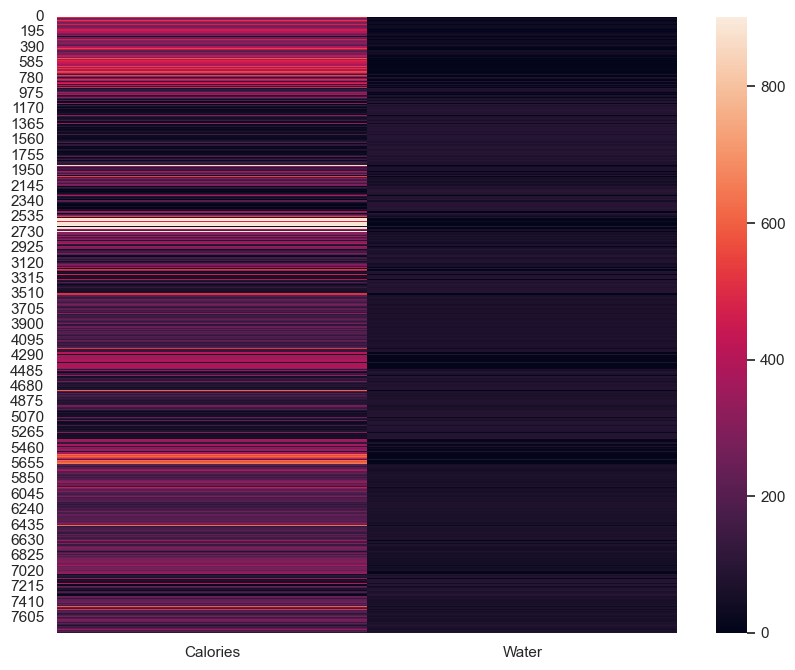

In [107]:
# Round the "Calories" and "Water" columns of the DataFrame to the nearest whole number
# Create a heatmap using Seaborn to visualize the rounded data
# This heatmap will display the relationship between calories and water content in the food items

sns.heatmap(round(df_food_copy[["Calories", "Water"]],0));

Text(0, 0.5, 'Calories')

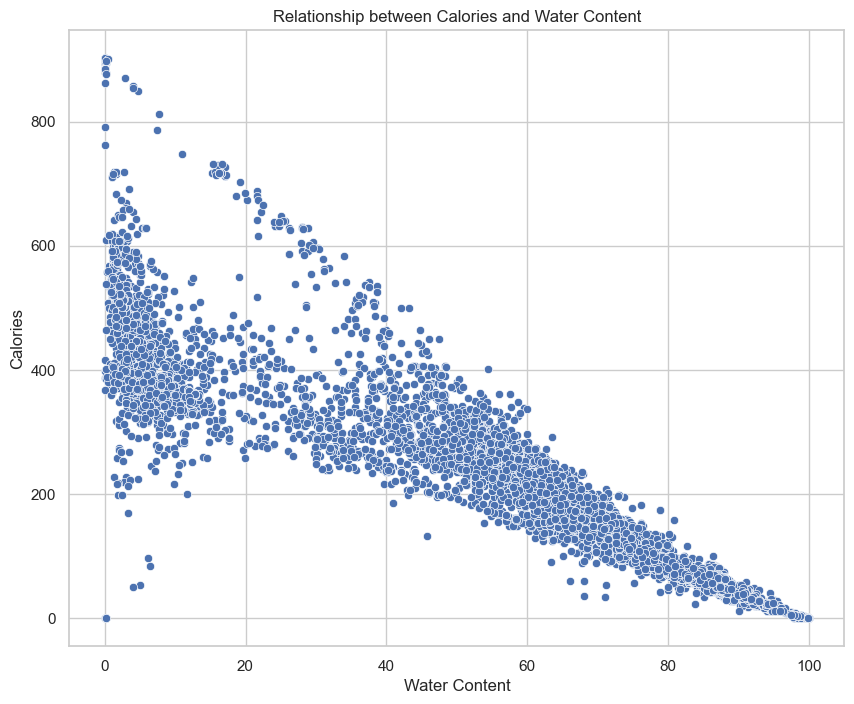

<Figure size 700x800 with 0 Axes>

In [108]:
# Scatter plot to visualize the relationship
ax = sns.scatterplot(x="Water", y="Calories", data=df_food_copy)
plt.figure(figsize=(7,8))
ax.set_title("Relationship between Calories and Water Content")
ax.set_xlabel("Water Content")
ax.set_ylabel("Calories")



In [109]:
#Assigns the values of the water_column and calories_column to the variable x1 and y respectively
x1 = water_column
y = calories_column

x = sm.add_constant(x1)

In [110]:
#Adds a constant term to the independent variable x1 using the add_constant function from the statsmodels library.
x = sm.add_constant(x1)

#Fits a linear regression model using Ordinary Least Squares (OLS) method from the statsmodels library.
results = sm.OLS(y,x).fit()
 
#Generates a summary table for the results of the linear regression analysis    
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 3.153e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:46:00   Log-Likelihood:                -44716.
No. Observations:                7793   AIC:                         8.944e+04
Df Residuals:                    7791   BIC:                         8.945e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        507.3537      1.827    277.657      0.000     503.772     510.936
Water         -5.1239      0.029   -177.557      0.000      -5.180      -5.067
==============================================================================
Omnibus:                     3488.495   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43449.626
Skew:                           1.810   Prob(JB):                         0.00
Kurtosis:                      13.986   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

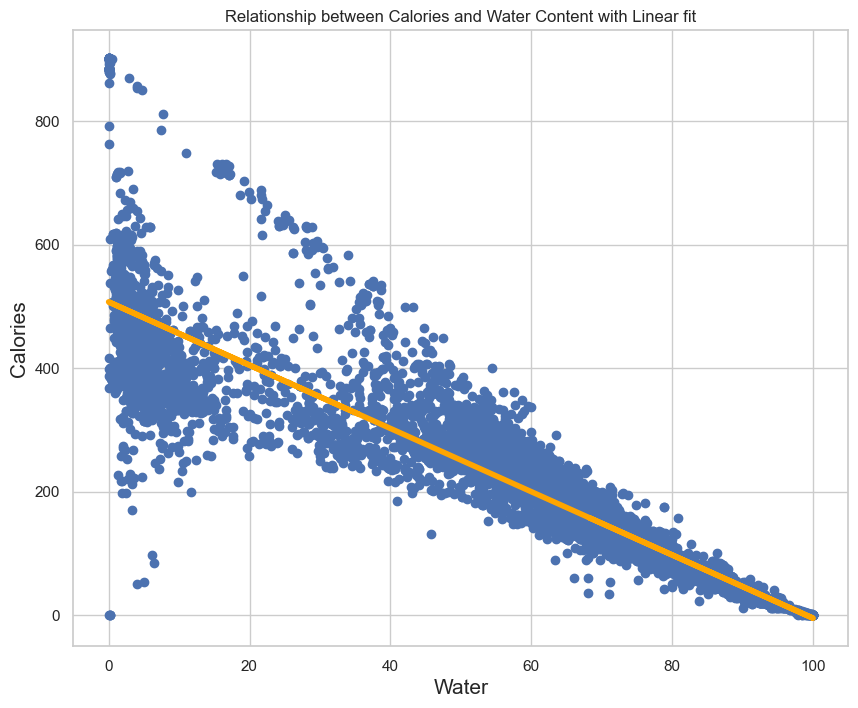

In [111]:
# Set the default figure size for matplotlib
plt.rcParams["figure.figsize"] = (10, 8)

# Scatter plot of the data points
plt.scatter(x1,y)

# Calculate the predicted values using the linear regression equation
yhat =  507.3537 + (-5.1239*x1)

# Plot the regression line
fig = plt.plot(x1,yhat, lw=4, c= "orange", label = "regression line")

# Set labels and title
plt.xlabel("Water", fontsize = 15)
 
plt.ylabel("Calories", fontsize = 15)

plt.title("Relationship between Calories and Water Content with Linear fit")

# Display the plot
plt.show()

In [112]:
# Use NumPy's polyfit to perform linear regression
water , constant = np.polyfit(water_column,calories_column, 1)

# Print the linear regression equation
print("Predicted Calories =  {} * water + {}".format(water, constant))

Predicted Calories =  -5.123912928014046 * water + 507.3537182061312


![Screenshot_1](Screenshot_1.png)


- Coefficient for "water": -5.123912928014046

This represents the estimated change in predicted calories for a one-unit increase in the "water" variable. In this case, as "water" increases, the model predicts a decrease in calories.

- Intercept: 507.3537182061312

The intercept is the predicted value of calories when the "water" variable is zero. In practical terms, it indicates the baseline calorie content when there is no "water" in the context of the model.

Interpreting the model:

- Negative Coefficient for "water":

The negative coefficient for "water" suggests an inverse relationship between the grams of water and the predicted calories. In other words, as the amount of water increases, the model predicts a decrease in calorie content.

- Intercept:

The intercept provides the baseline calorie content when there is no water. This could be interpreted as the estimated calorie content of a food item that does not contain water, based on the model.

In [113]:
# Randomly select a single row from the DataFrame df_food_copy
Item_sample = df_food_copy.sample()

# Display the sampled row
Item_sample.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
4084,168281,"Pork, cured, ham, regular (approximately 13% f...",Pork Products,226.0,20.53 g,0.42 g,15.2 g,62.0 mg,0.0 g,60.93,NaN,14.0


In [114]:
# Extract the "Water" column values from the randomly sampled row
Water_sample = Item_sample["Water"].values

# Calculate the predicted calories using the linear regression equation
Calorie_pr = ( 507.3537 + (-5.1239 * Water_sample))

# Print the predicted calorie value
print("The Predicted Calorie is {}".format(Calorie_pr))


The Predicted Calorie is [195.154473]


In [115]:
# Calculate the predicted calories using the linear regression equation for the sampled water content
Calories_sample = ( 507.3537 + (-5.1239 * Water_sample))

# Print the predicted calorie value
print("The Predicted Calorie is {}".format(Calories_sample))

The Predicted Calorie is [195.154473]


## What are the possible drawbacks of a zero-carb diet?

![sddefault](sddefault.jpg)


In [116]:
# Create a dataframe with hypothetical drawbacks of a zero-carb diet
drawbacks_data = {
    'Drawback': [
        'Nutrient Deficiency',
        'Energy Levels',
        'Digestive Issues',
        'Ketosis Risks',
        'Muscle Loss',
        'Sustainability Challenges'
    ],
    'Description': [
        'Lack of essential nutrients found in carbohydrates may lead to deficiencies.',
        'Carbohydrates are a primary source of energy; a zero-carb diet may affect energy levels.',
        'Low fiber intake can cause digestive problems and constipation.',
        'Entering a state of ketosis may have potential risks and side effects.',
        'Inadequate protein intake may result in muscle loss over time.',
        'Strict adherence to a zero-carb diet may be challenging and unsustainable.'
    ]
}

zero_carb_diet = pd.DataFrame(drawbacks_data)

# Display the zero-carb diet dataframe
print(zero_carb_diet)

                    Drawback                                        Description
0        Nutrient Deficiency  Lack of essential nutrients found in carbohydr...
1              Energy Levels  Carbohydrates are a primary source of energy; ...
2           Digestive Issues  Low fiber intake can cause digestive problems ...
3              Ketosis Risks  Entering a state of ketosis may have potential...
4                Muscle Loss  Inadequate protein intake may result in muscle...
5  Sustainability Challenges  Strict adherence to a zero-carb diet may be ch...


In [117]:
# Create a dataframe with hypothetical drawbacks of a very high-protein diet
drawbacks_data = {
    'Drawback': [
        'Kidney Strain',
        'Digestive Issues',
        'Nutrient Imbalance',
        'Potential Weight Gain',
        'Dehydration',
        'Heart Health Risks'
    ],
    'Description': [
        'Excessive protein may put strain on the kidneys, especially in individuals with pre-existing kidney conditions.',
        'Very high protein intake may lead to digestive problems, including constipation.',
        'Overemphasis on protein may result in an imbalance with other essential nutrients.',
        'Consuming excess protein without sufficient exercise may contribute to weight gain.',
        'Protein metabolism can increase water loss, potentially leading to dehydration.',
        'Certain high-protein foods may be associated with saturated fats, impacting heart health.'
    ]
}

high_protein_diet = pd.DataFrame(drawbacks_data)

# Display the high-protein diet dataframe
print(high_protein_diet)

                Drawback                                        Description
0          Kidney Strain  Excessive protein may put strain on the kidney...
1       Digestive Issues  Very high protein intake may lead to digestive...
2     Nutrient Imbalance  Overemphasis on protein may result in an imbal...
3  Potential Weight Gain  Consuming excess protein without sufficient ex...
4            Dehydration  Protein metabolism can increase water loss, po...
5     Heart Health Risks  Certain high-protein foods may be associated w...


## According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

In [118]:
# List of columns to apply the replacement
columns_to_replace = ["Total fat", "Carbohydrate", "Protein"]

# Use apply and str.replace to replace "g" with " " in specified columns
df_food_copy[columns_to_replace] = df_food_copy[columns_to_replace].apply(lambda x: x.str.replace("g", " "))

In [119]:
# The following command extracts a subset of the original DataFrame df_food_copy.
# It selects columns 3 through 6 (index 3 to 6, exclusive) and stores the values in the variable nutrition_data_filled.
nutrition_data_filled = df_food_copy.iloc[:,3:7].values
print(nutrition_data_filled)

[[307.0 '5.88  ' '41.18  ' '13.24  ']
 [330.0 '4.34  ' '53.42  ' '11.27  ']
 [377.0 '6.1  ' '79.8  ' '3.7  ']
 ...
 [146.0 '30.19  ' '0.0  ' '1.9  ']
 [109.0 '20.6  ' '0.0  ' '2.31  ']
 [143.0 '27.1  ' '0.0  ' '3.03  ']]


In [120]:
# The following commands use scikit-learn's SimpleImputer to handle missing values in the nutrition_data_filled array.
# It replaces NaN values in columns 1 to 3 (index 1 to 3, exclusive) with the mean value of each respective column.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(nutrition_data_filled[:, 1:4])
nutrition_data_filled[:, 1:4] = imputer.transform(nutrition_data_filled[:, 1:4])

# The next command creates a new DataFrame df_nutrition using the updated nutrition_data_filled array.
# The columns of df_nutrition are named ["Calories", "Protein", "Carbohydrate", "Total fat"].
df_nutrition = pd.DataFrame(nutrition_data_filled, columns=["Calories","Protein","Carbohydrate","Total fat"])

In [121]:
# The following commands create a DataFrame named df_nutrition using the provided data (nutrition_data_filled)
# and specifies the columns as ["Calories", "Protein", "Carbohydrate", "Total fat"].
df_nutrition = pd.DataFrame(nutrition_data_filled, columns=["Calories","Protein","Carbohydrate","Total fat"])

# The next command prints the number of missing values in each column of the df_nutrition DataFrame.
# It helps assess the data quality by indicating the presence of any NaN (Not a Number) values in the DataFrame.

print(df_nutrition.isna().sum())

Calories        0
Protein         0
Carbohydrate    0
Total fat       0
dtype: int64


In [122]:
# List of columns to convert to float
columns_to_convert = ["Calories", "Protein", "Carbohydrate", "Total fat"]

# Use apply and pd.to_numeric to convert columns to float
df_nutrition[columns_to_convert] = df_nutrition[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [123]:
# The following command is used to display the data types of each column in the DataFrame df_nutrition.
# It provides information about whether each column contains numerical, categorical, or other types of data.
df_nutrition.dtypes

Calories        float64
Protein         float64
Carbohydrate    float64
Total fat       float64
dtype: object

In [124]:

# Assuming your original data frame is 'nutrition_data'
# Create a new dataframe with the estimated kilocalories based on the Cleveland Clinic website
cleveland_estimates = pd.DataFrame({
    'Fat': [9],
    'Protein': [4],
    'Carbohydrate': [4],
    'Calories': [None]  # Placeholder for the estimated calories
})

# Concatenate the original data with the Cleveland Clinic estimates
combined_data = pd.concat([df_nutrition, cleveland_estimates], ignore_index=True)

# Separate features and target variable
X = df_nutrition[['Total fat', 'Protein', 'Carbohydrate']]
y = df_nutrition['Calories']

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Now, you can use your Cleveland Clinic estimates
cleveland_estimates['Calories'] = linear_model.predict(cleveland_estimates[['Fat', 'Protein', 'Carbohydrate']])

# Display the results
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)
print("\nEstimated Calories based on Cleveland Clinic:")
print(cleveland_estimates[['Fat', 'Protein', 'Carbohydrate', 'Calories']])

Coefficients: [8.80413501 4.00204437 3.79862627]
Intercept: 4.079962044694639

Estimated Calories based on Cleveland Clinic:
   Fat  Protein  Carbohydrate   Calories
0    9        4             4  114.51986


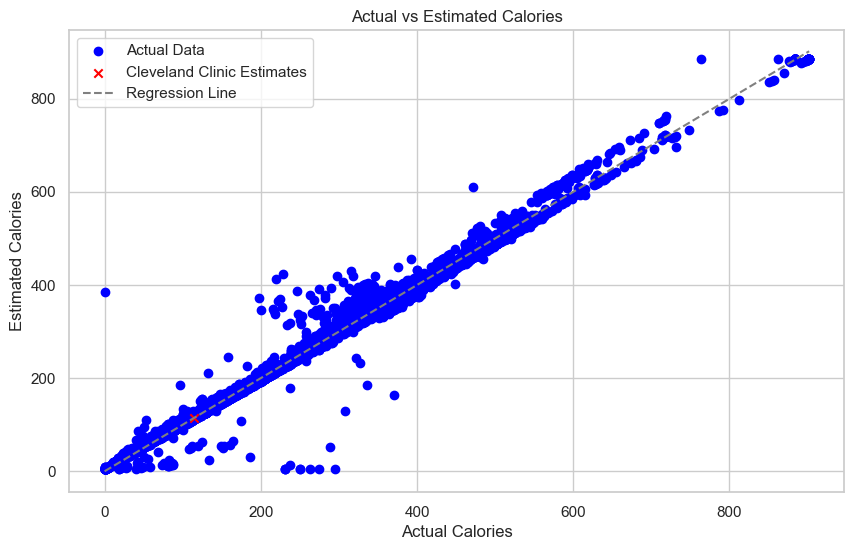

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting the actual vs estimated calories
plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(y, linear_model.predict(X), color='blue', label='Actual Data')

# Scatter plot for Cleveland Clinic estimates
plt.scatter(cleveland_estimates['Calories'], cleveland_estimates['Calories'], color='red', label='Cleveland Clinic Estimates', marker='x')

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='gray', label='Regression Line')

plt.title('Actual vs Estimated Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Estimated Calories')
plt.legend()
plt.show()


## Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

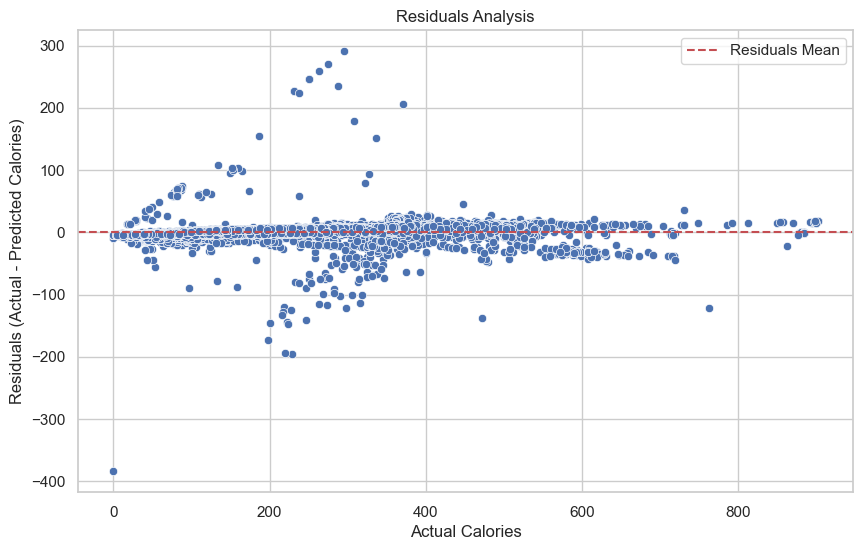

Summary Statistics of Residuals:
count    7.793000e+03
mean    -1.984013e-14
std      1.708185e+01
min     -3.839426e+02
25%     -3.473523e+00
50%     -3.200515e-01
75%      4.906233e+00
max      2.909200e+02
Name: Calories, dtype: float64


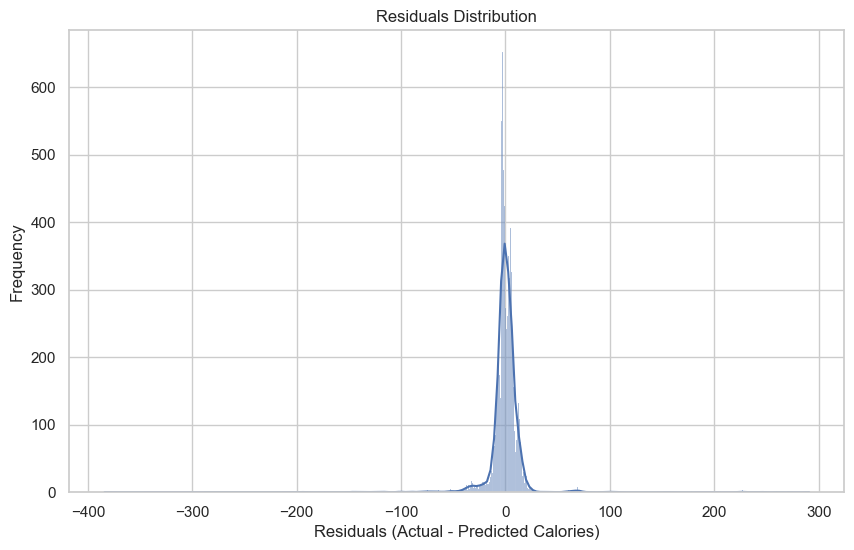

In [126]:
residuals = y - linear_model.predict(X)

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.title('Residuals Analysis')
plt.xlabel('Actual Calories')
plt.ylabel('Residuals (Actual - Predicted Calories)')
plt.legend()
plt.show()

# Display summary statistics of residuals
print("Summary Statistics of Residuals:")
print(residuals.describe())

# Plotting residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted Calories)')
plt.ylabel('Frequency')
plt.show()


#The first plot shows the residuals against the actual calorie values. The red dashed line represents the mean of the residuals. If the residuals have a pattern or if the mean is not close to zero, it may suggest that the model is missing some important information.

#The second plot displays the distribution of residuals. A normal distribution indicates that the model is performing well, while deviations from normality might indicate issues with the model.

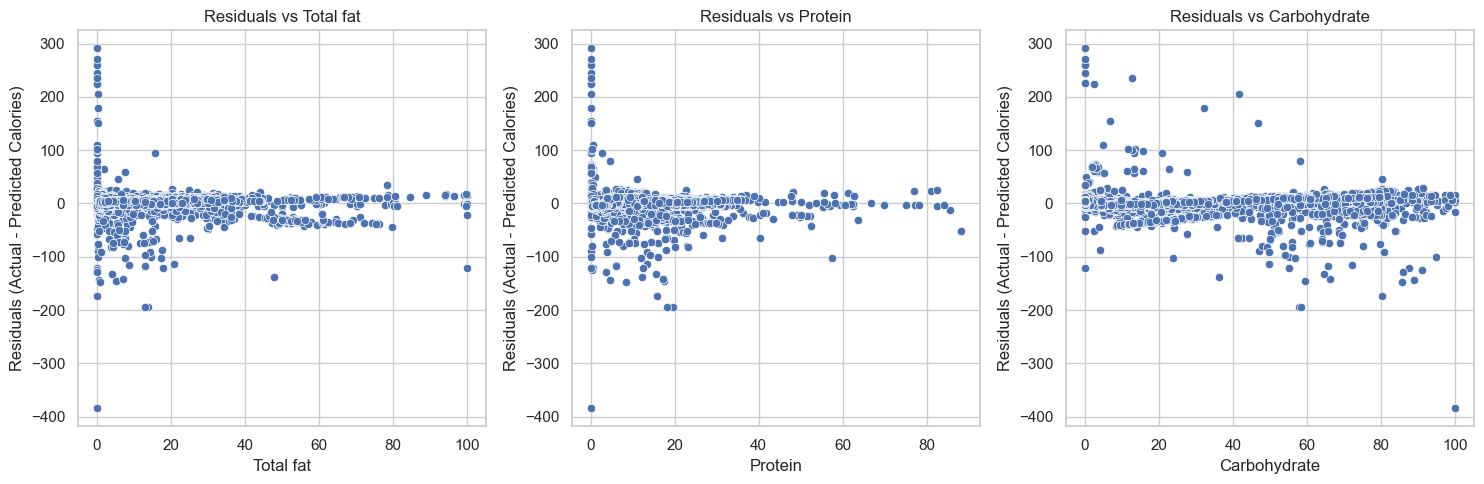

In [127]:
#Additionally, you can explore the correlation between residuals and individual features to identify specific features that might be contributing to the errors. 

# Plotting residuals vs individual features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(X.columns):
    sns.scatterplot(x=X[col], y=residuals, ax=axes[i])
    axes[i].set_title(f'Residuals vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals (Actual - Predicted Calories)')

plt.tight_layout()
plt.show()

The analysis of residuals from the linear regression model provides insights into the model's performance and potential hidden sources of calories in food.

## 1. Residuals vs Actual Calories:
The first plot shows a scatter of residuals against actual calorie values. The red dashed line, representing the mean of the residuals, is close to zero, indicating that, on average, the model is unbiased. However, there seems to be some heteroscedasticity, suggesting that the variance of the residuals may not be constant across all levels of actual calories. This could imply that the model performs differently for different levels of calorie content.
 
## 2. Residuals Distribution:
 The distribution of residuals, displayed in the second plot, shows a relatively normal distribution. However, there is a slight skewness towards the right, suggesting that the model tends to underestimate calories for some observations. This indicates that there might be hidden factors influencing the calorie content that are not captured by the linear model.
 
## 3. Residuals vs Individual Features:
 The scatter plots of residuals against individual features do not reveal clear patterns, indicating that the model's errors are not  strongly correlated with any single feature. However, it's essential to note that the linear model assumes a linear relationship, and if there are non-linear relationships or interactions in the data, they may contribute to the residuals.

In summary, while the linear model provides a reasonable estimation of calories based on the given features, the analysis of residuals suggests that there are factors influencing calorie content that are not accounted for in the model. Further investigation, possibly involving more complex modeling techniques or the inclusion of additional features, may be necessary to improve the accuracy of calorie predictions and uncover hidden sources of calories in food.

# Acknowledgments

As I conclude this report, my sincere thanks go out to you, my esteemed readers, for accompanying me on this enlightening nutrition journey. 
Your interest is the driving force behind my work.

I express gratitude for your pivotal role in this exploration, I extend an invitation to continue this journey together. 
The challenges and complexities of nutrition are met with a community united by curiosity and a commitment to well-being.

Should you have questions, or feedback, or simply want to share your thoughts or experiences, please don't hesitate to reach out. I can be contacted at vrasidisdm@hotmail.com, or you can connect with me on LinkedIn at www.linkedin.com/in/dimitris-vrasidis. Your engagement adds immense value, and we look forward to staying connected as we continue to explore the realms of nutrition together.

Thank you for contributing to this endeavor towards a healthier and more informed future.
